In [4]:
import numpy as np
import pyqsp
from pyqsp import angle_sequence, response
from pyqsp.poly import polynomial_generators, PolyTaylorSeries
from typing import Dict
import numpy as np
from stateprep_qet.utils import h, h_hat

In [5]:
EXP_RATE = 1  # decay rate of the Gaussian
F = lambda x: np.exp(-EXP_RATE * (x**2))  # Gaussian
# F = lambda x: np.tanh(x)
MIN = -1  # min x
MAX = 1  # max x

H = h(f=F, min=MIN, max=MAX)
POLY_FUNC = h_hat(h=H, h_max=F(0))
# POLY_FUNC = F
POLY_DEGREE = 15
POLY_MAX_SCALE = 0.7

POLY_EVEN = lambda x: (POLY_FUNC(x) + POLY_FUNC(-x))
POLY_ODD = lambda x: (POLY_FUNC(x) - POLY_FUNC(-x))
print("h_max", F(0))

h_max 1.0


In [6]:
poly_even = PolyTaylorSeries().taylor_series(
    func=POLY_EVEN,
    degree=POLY_DEGREE+3,
    max_scale=POLY_MAX_SCALE,
    chebyshev_basis=True,
    cheb_samples=33 * (POLY_DEGREE+3),
)
print("poly:", poly_even)
print("poly.coeffs:", poly_even.coef)
print("len(poly.coffes):", len(poly_even.coef))
is_even = np.max(np.abs(poly_even.coef[0::2])) > 1e-8
is_odd = np.max(np.abs(poly_even.coef[1::2])) > 1e-8
print("is_even", is_even)
print("is_odd", is_odd)

[PolyTaylorSeries] (Cheb) max 0.686445660277253 is at 0.4605797696093287: normalizing
[PolyTaylorSeries] (Cheb) average error = 0.00010775957719704924 in the domain [-1, 1] using degree 18
poly: 0.38682181 + (1.52685947e-16) T_1(x) - 0.32682304 T_2(x) +
(1.61196692e-16) T_3(x) - 0.1193816 T_4(x) + (2.02451535e-16) T_5(x) +
0.08014394 T_6(x) + (1.39601962e-16) T_7(x) - 0.00982463 T_8(x) +
(1.96578519e-16) T_9(x) - 0.00086263 T_10(x) + (1.22286775e-16) T_11(x) -
0.00025381 T_12(x) + (1.57651535e-16) T_13(x) - 0.00027523 T_14(x) +
(1.70595184e-16) T_15(x) - 0.00021569 T_16(x) + (2.11057615e-16) T_17(x) -
0.00017157 T_18(x)
poly.coeffs: [ 3.86821810e-01  1.52685947e-16 -3.26823041e-01  1.61196692e-16
 -1.19381598e-01  2.02451535e-16  8.01439400e-02  1.39601962e-16
 -9.82463434e-03  1.96578519e-16 -8.62627756e-04  1.22286775e-16
 -2.53805529e-04  1.57651535e-16 -2.75228511e-04  1.70595184e-16
 -2.15694597e-04  2.11057615e-16 -1.71569526e-04]
len(poly.coffes): 19
is_even True
is_odd False


In [7]:
poly_odd = PolyTaylorSeries().taylor_series(
    func=POLY_ODD,
    degree=POLY_DEGREE+2,
    max_scale=POLY_MAX_SCALE,
    chebyshev_basis=True,
    cheb_samples=33 * (POLY_DEGREE+2),
)
print("poly:", poly_odd)
print("poly.coeffs:", poly_odd.coef)
print("len(poly.coffes):", len(poly_odd.coef))
is_even = np.max(np.abs(poly_odd.coef[0::2])) > 1e-8
is_odd = np.max(np.abs(poly_odd.coef[1::2])) > 1e-8
print("is_even", is_even)
print("is_odd", is_odd)

[PolyTaylorSeries] (Cheb) max 0.7122001204303382 is at 0.49394097773137463: normalizing
[PolyTaylorSeries] (Cheb) average error = 0.00011895642804999683 in the domain [-1, 1] using degree 17
poly: -4.02574666e-18 + 0.36098851 T_1(x) + (5.08157475e-17) T_2(x) -
0.45763028 T_3(x) + (2.79772051e-16) T_4(x) + 0.10004642 T_5(x) -
(7.78758001e-18) T_6(x) + 0.01255081 T_7(x) - (5.89681758e-17) T_8(x) -
0.00548031 T_9(x) + (2.87245889e-18) T_10(x) - 0.00010594 T_11(x) +
(2.24382868e-16) T_12(x) - 0.00031003 T_13(x) + (1.86128337e-16) T_14(x) -
0.00024792 T_15(x) - (5.46594874e-17) T_16(x) - 0.00019513 T_17(x)
poly.coeffs: [-4.02574666e-18  3.60988509e-01  5.08157475e-17 -4.57630280e-01
  2.79772051e-16  1.00046424e-01 -7.78758001e-18  1.25508052e-02
 -5.89681758e-17 -5.48030663e-03  2.87245889e-18 -1.05943917e-04
  2.24382868e-16 -3.10033897e-04  1.86128337e-16 -2.47923620e-04
 -5.46594874e-17 -1.95125727e-04]
len(poly.coffes): 18
is_even False
is_odd True


[-1.5708658329586906, -0.00011331783871404433, -0.00013746143090398455, -0.000124417042264513, -0.00047508781111949006, -0.005549811772415314, 0.04660337196653064, -0.07439843539460433, -0.1759749939722075, 0.42968607867327746, -0.1759749939722115, -0.07439843539460789, 0.04660337196652842, -0.005549811772418645, -0.0004750878111225987, -0.00012441704226762162, -0.00013746143090687113, -0.00011331783871693091, -6.950616379719499e-05]
len(phiset_even): 19
[-1.5708772586016408, -0.0001307584738685641, -0.00015343048743554633, -4.0668919061737085e-05, -0.0030487002374979255, 0.007274320390067146, 0.05533567110813564, -0.25482869186228285, 0.20050584432427643, 0.20050584432427687, -0.25482869186228285, 0.05533567110813542, 0.007274320390067812, -0.0030487002374983696, -4.066891906151504e-05, -0.00015343048743576837, -0.00013075847386834205, -8.093180674428879e-05]
len(phiset_odd): 18


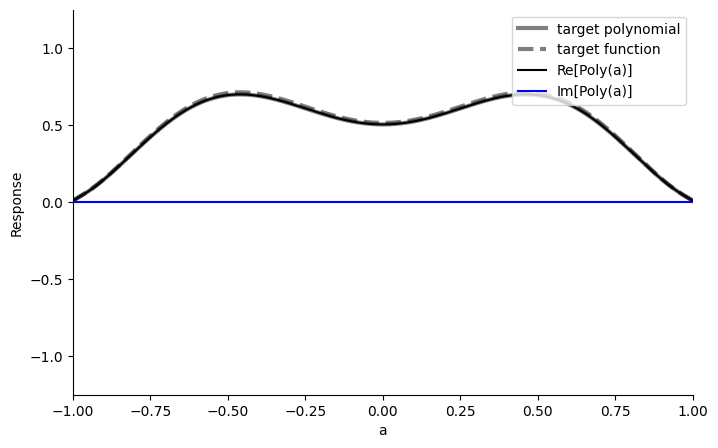

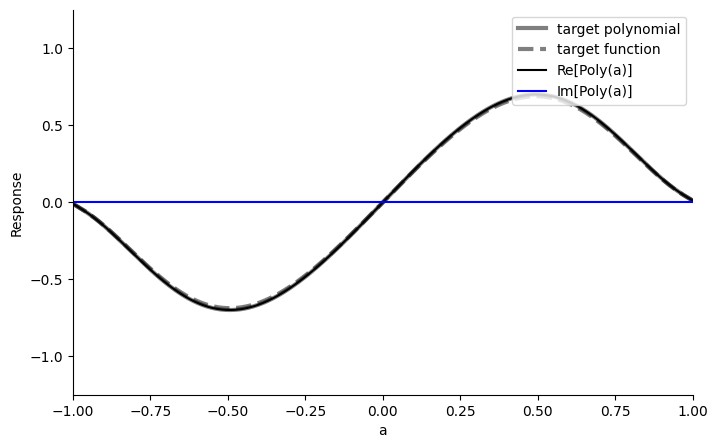

In [10]:
# Compute full phases
(phiset_even) = angle_sequence.QuantumSignalProcessingPhases(
    poly_even, method="laurent"
)
print(phiset_even)
print("len(phiset_even):", len(phiset_even))
(phiset_odd) = angle_sequence.QuantumSignalProcessingPhases(
    poly_odd, method="laurent"
)
print(phiset_odd)
print("len(phiset_odd):", len(phiset_odd))

response.PlotQSPResponse(
    np.append(phiset_even, []), pcoefs=poly_even, target=lambda x: POLY_MAX_SCALE * POLY_EVEN(x)
)
response.PlotQSPResponse(
    np.append(phiset_odd, []), pcoefs=poly_odd, target=lambda x: POLY_MAX_SCALE * POLY_ODD(x)
)